In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt

## DHB of living trees

In [2]:
dbh_living = pd.read_excel('./data/dbh-of-living trees.xlsx', header=0)
dbh_living = pd.DataFrame(np.sort(dbh_living.values, axis=0), index=dbh_living.index, columns=dbh_living.columns)
dbh_living.head()

,2013-żywe,2014-żywe,2015-żywe,2016-żywe,2017-żywe,2018-żywe,2019-żywe,2020-żywe,2021-żywe,2022-żywe
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
3,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
4,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0


## DBH of dead trees

In [3]:
dbh_dead = pd.read_excel(r'./data/Martwe pnie od 2014.xls')

In [4]:
dbh_dead = dbh_dead[dbh_dead[' pi'].astype(str).str.isdigit()]
dbh_dead.rename(columns = {' pi':'Pierśnica'}, inplace = True)
dbh_dead.head(10)

,numer,kwa,Unnamed: 2,ka,Pierśnica,Rok,Uwagi,kategorie:,1 - stojące
5,6002.0,80,NaN,2,65,2014,NaN,NaN,NaN
6,6004.0,87.88,NaN,2,50,2014,NaN,NaN,NaN
7,6006.0,87.88,NaN,2,39,2014,NaN,NaN,NaN
8,6008.0,101.102,NaN,2,49,2014,NaN,NaN,NaN
9,6011.0,94.95,NaN,1,36,2014,NaN,NaN,NaN
10,6012.0,71.72,NaN,2,64,2014,NaN,NaN,NaN
11,6014.0,63.64,NaN,2,57,2014,NaN,NaN,NaN
12,6016.0,63.64,NaN,2,57,2014,NaN,NaN,NaN
13,6018.0,93.94,NaN,1,24,2014,NaN,NaN,NaN
14,6019.0,99.1,NaN,3,39,2014,NaN,NaN,NaN


## intensity of tree dieback

In [5]:
study_area = 14.4

intensity_dict = {
    '2014': dbh_dead.loc[(dbh_dead['Rok'] == 2014)].shape[0] / study_area,
    '2015': dbh_dead.loc[(dbh_dead['Rok'] == 2015)].shape[0] / study_area,
    '2016': dbh_dead.loc[(dbh_dead['Rok'] == 2016)].shape[0] / study_area,
    '2017': dbh_dead.loc[(dbh_dead['Rok'] == 2017)].shape[0] / study_area,
    '2018': dbh_dead.loc[(dbh_dead['Rok'] == 2018)].shape[0] / study_area,
    '2019': dbh_dead.loc[(dbh_dead['Rok'] == 2019)].shape[0] / study_area,
    '2020': dbh_dead.loc[(dbh_dead['Rok'] == 2020)].shape[0] / study_area,
    '2021': dbh_dead.loc[(dbh_dead['Rok'] == 2021)].shape[0] / study_area,
    '2022': dbh_dead.loc[(dbh_dead['Rok'] == 2022)].shape[0] / study_area
}

In [6]:
df_intensity = pd.DataFrame([intensity_dict])
df_intensity = pd.melt(df_intensity)
df_intensity.columns = ['rok', 'gęstość']
df_intensity

,rok,gęstość
0,2014,6.180556
1,2015,8.125000
2,2016,7.569444
3,2017,5.694444
4,2018,4.791667
5,2019,1.736111
6,2020,1.875000
7,2021,2.430556
8,2022,2.638889


In [7]:
%matplotlib inline

Text(0, 0.5, 'Liczba drzew obumarłych na 1 hektar')

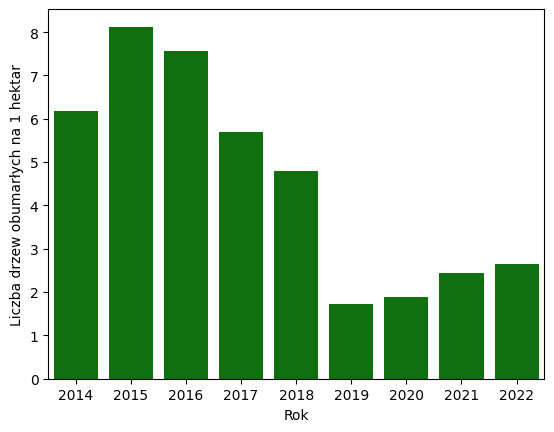

In [17]:
sns.barplot(data = df_intensity, x = df_intensity['rok'], y = df_intensity['gęstość'],
           color = 'green')
plt.xlabel("Rok")
plt.ylabel("Liczba drzew obumarłych na 1 hektar")

#### data preparation

In [9]:
def create_df(start_year, stop_year):
    
    name_living = '{}-żywe'.format(stop_year)
    name_dead = '{}-{} martwe'.format(start_year, stop_year)
    
    mask = ((dbh_dead['Rok'] >= start_year) & (dbh_dead['Rok'] <= stop_year))
    
    df1 = pd.DataFrame(dbh_dead[mask]).reset_index(drop = True)['Pierśnica']

    df2 = pd.concat([df1, dbh_living[name_living].dropna()], axis = 1)
    df2.columns = [name_dead, '{} żywe'.format(stop_year)]

    return df2

In [10]:
years_2014_2018 = create_df(2014, 2018)
years_2019_2022 = create_df(2019, 2022)
years_2014_2022 = create_df(2014, 2022)

#### summary chart

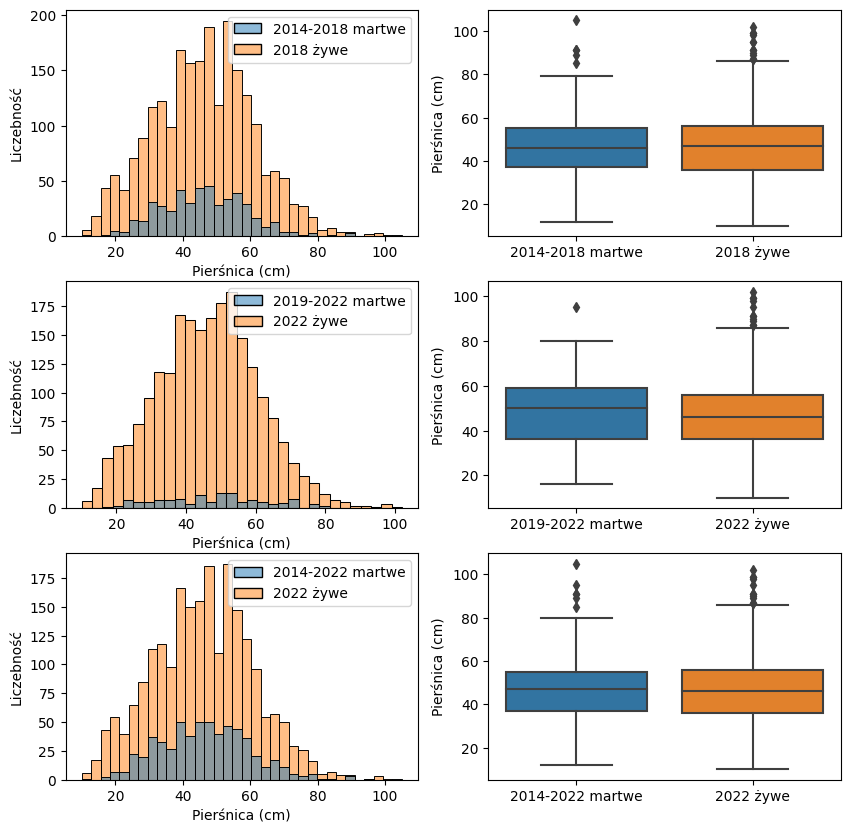

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.histplot(years_2014_2018, ax=axes[0][0])
sns.histplot(years_2019_2022, ax=axes[1][0])
sns.histplot(years_2014_2022, ax=axes[2][0])

sns.boxplot(years_2014_2018, ax=axes[0][1])
sns.boxplot(years_2019_2022, ax=axes[1][1])
sns.boxplot(years_2014_2022, ax=axes[2][1])

for i in range(0,3):
    for j in range(0,2):
        if j == 0:     
            axes[i][j].set_ylabel("Liczebność")
            axes[i][j].set_xlabel("Pierśnica (cm)")
        if j == 1:
            axes[i][j].set_ylabel("Pierśnica (cm)")

#### descriptive statistics

In [12]:
def df_stats(*args):
    df = pd.DataFrame()
    for element in args:
        columns = list(element.columns)       
        df[columns[0]] = element.iloc[:,0].dropna().astype(np.int64).agg(['median', 'mean']).round(0).astype(np.int64)
        df[columns[1]] = element.iloc[:,1].dropna().astype(np.int64).agg(['median', 'mean']).round(0).astype(np.int64)
    df = df[['2014-2018 martwe', '2019-2022 martwe', '2014-2022 martwe', '2018 żywe', '2022 żywe',]]
    df = df.rename(index={'median': 'mediana', 'mean': 'średnia'})
    df1 = df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
    df1.set_properties(**{'text-align': 'center'})
    return df1

In [13]:
df_stats(years_2014_2018, years_2019_2022, years_2014_2022)

,2014-2018 martwe,2019-2022 martwe,2014-2022 martwe,2018 żywe,2022 żywe
mediana,46,50,47,47,46
średnia,46,48,47,46,46


#### statistical tests

2014-2018

In [14]:
ks_2samp(years_2014_2018.iloc[:,0].dropna(), years_2014_2018.iloc[:,1].dropna())

KstestResult(statistic=0.055775290564485214, pvalue=0.1719538524877319)

2019-2022

In [15]:
ks_2samp(years_2019_2022.iloc[:,0].dropna(), years_2019_2022.iloc[:,1].dropna())

KstestResult(statistic=0.08891418247515809, pvalue=0.28866312499634056)

2014-2022

In [49]:
ks_2samp(years_2014_2022.iloc[:,0].dropna(), years_2014_2022.iloc[:,1].dropna())

KstestResult(statistic=0.04350258392600846, pvalue=0.3292262743076923)

### export data frames

In [152]:
# intensity of tree dieback
intensity_trans = df_intensity.transpose()
intensity_trans.columns = intensity_trans.iloc[0]
intensity_trans = intensity_trans.rename_axis(None, axis=1).iloc[1:]

In [153]:
intensity_trans

,2014,2015,2016,2017,2018,2019,2020,2021,2022
gęstość,6.180556,8.125,7.569444,5.694444,4.791667,1.736111,1.875,2.430556,2.638889


In [156]:
def create_table_to_export(year):
    df = pd.DataFrame(data = {
        'pierśnica średnia': [create_df(year, year).iloc[:,0].dropna().astype(int).agg(['mean', 'median', 'std'])[0]],
        'pierśnica mediana': [create_df(year, year).iloc[:,0].dropna().astype(int).agg(['mean', 'median', 'std'])[1]],
        'pierśnica sd': [create_df(year, year).iloc[:,0].dropna().astype(int).agg(['mean', 'median', 'std'])[2]]
    })    
    
    return df.transpose().rename(columns = {0: str(year)})

In [160]:
export_df = pd.concat([
    create_table_to_export(2014),
    create_table_to_export(2015),
    create_table_to_export(2016),
    create_table_to_export(2017),
    create_table_to_export(2018),
    create_table_to_export(2019),
    create_table_to_export(2020),
    create_table_to_export(2021),
    create_table_to_export(2022)], axis = 1)

export_df = pd.concat([
    intensity_trans,
    export_df
], axis = 0)

export_df

,2014,2015,2016,2017,2018,2019,2020,2021,2022
gęstość,6.180556,8.125,7.569444,5.694444,4.791667,1.736111,1.875,2.430556,2.638889
pierśnica średnia,47.617978,47.529915,45.376147,45.195122,45.26087,41.96,45.962963,51.542857,49.157895
pierśnica mediana,48.0,49.0,44.0,44.0,44.0,38.0,46.0,53.0,47.0
pierśnica sd,12.904814,11.039563,13.818123,13.935866,13.341281,18.840294,14.978142,13.1939,15.583301


In [164]:
# export data
export_df.to_csv('data/correlation_data/DBH.csv')